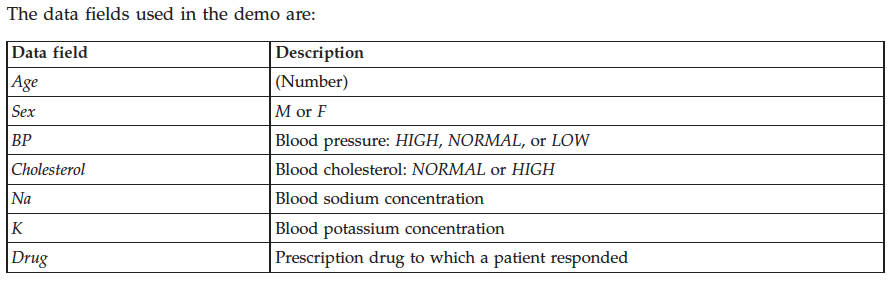

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("E:\DataScience-data\drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
cat=['Sex', 'BP', 'Cholesterol', 'Drug']
con=['Age',  'Na_to_K']

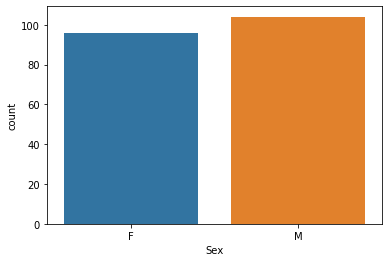

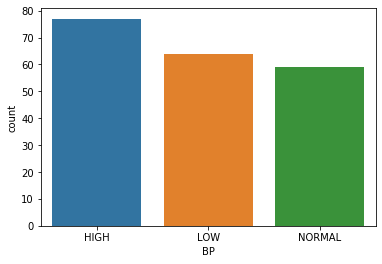

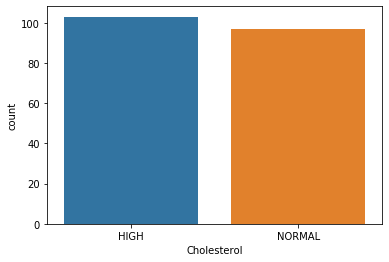

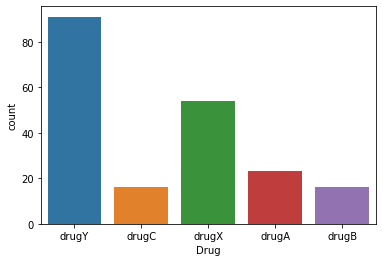

In [8]:
for i in cat:
    sns.countplot(x=i,data=df)
    plt.show()

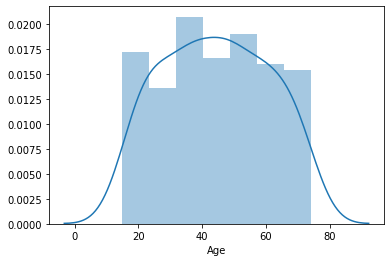

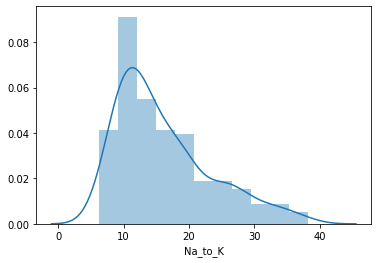

In [9]:
for i in con:
    sns.distplot(df[i])
    plt.show()

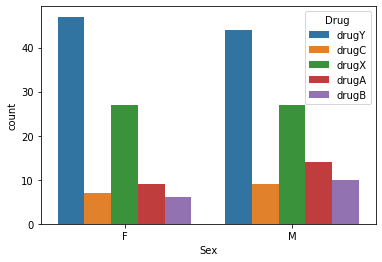

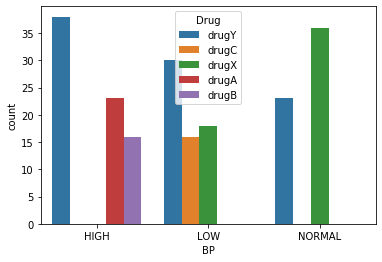

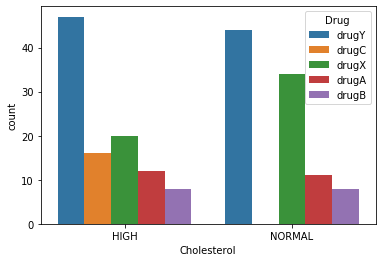

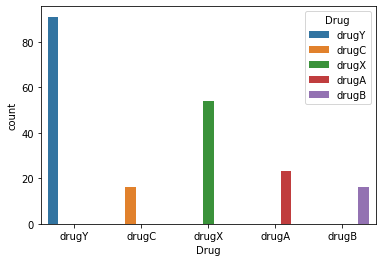

In [12]:
for i in cat:
    sns.countplot(x=i,hue="Drug",data=df)
    plt.show()

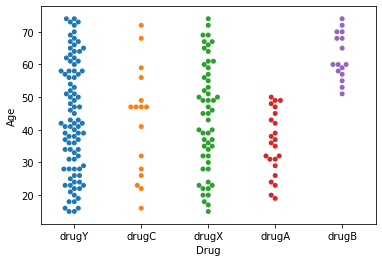

In [15]:
sns.swarmplot(x="Drug",y='Age',data=df)
plt.show()

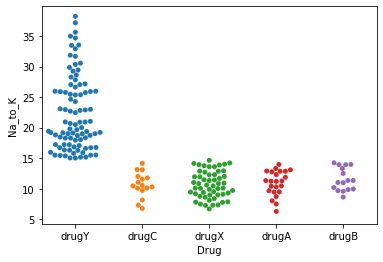

In [17]:
sns.swarmplot(x="Drug",y='Na_to_K',data=df)
plt.show()

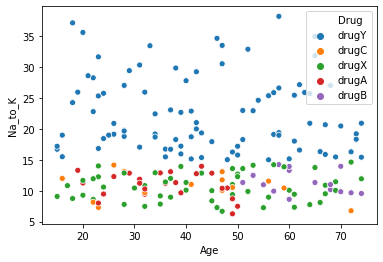

In [18]:
sns.scatterplot(x="Age",y="Na_to_K",hue="Drug",data=df)
plt.show()

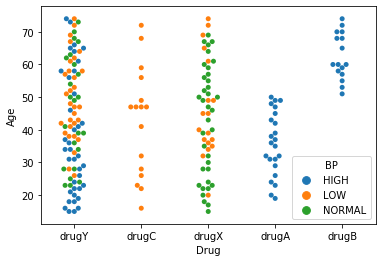

In [19]:
sns.swarmplot(x="Drug",y="Age",hue='BP',data=df)
plt.show()

In [31]:
#data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [40]:
encoder=ColumnTransformer([('one',OneHotEncoder(),[1,2,3])],remainder='passthrough')

In [41]:
x1=encoder.fit_transform(df)
x1=pd.DataFrame(x1)
x1.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,23.0,25.355,4.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,47.0,13.093,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,47.0,10.114,2.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,28.0,7.798,3.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,61.0,18.043,4.0


In [42]:
l1=LabelEncoder()


In [44]:
y=l1.fit_transform(df["Drug"])
y=pd.DataFrame(y)
y.head()

,0
0,4
1,2
2,2
3,3
4,4


In [45]:
print(x1.shape)
print(y.shape)

(200, 10)
(200, 1)


In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.3)

In [47]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(140, 10)
(60, 10)
(140, 1)
(60, 1)


In [48]:
from sklearn.neural_network import MLPClassifier
algo=MLPClassifier(hidden_layer_sizes=(60,60),activation='relu',
                  max_iter=2000)

In [49]:
algo.fit(xtrain,ytrain)

C:\Users\aspdiscovery\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score
ypred=algo.predict(xtest)

In [54]:
accuracy_score(ytest,ypred)

1.0

In [55]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred))

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0 28]]
